In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import random
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar100

In [4]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)
print(X_test.shape, X_test.dtype)
print(y_test.shape, y_test.dtype)

(50000, 32, 32, 3) uint8
(50000, 1) int32
(10000, 32, 32, 3) uint8
(10000, 1) int32


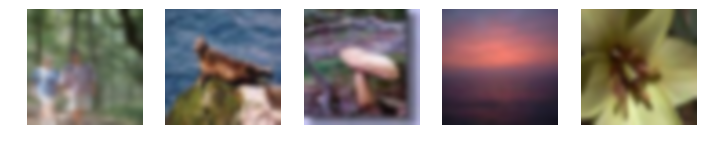

In [6]:
plt.figure(figsize=(12,8))
for i in range(1,6):
    plt.subplot(1,5,i)
    plt.imshow(X_test[i], interpolation='bicubic')
    plt.axis('off')
plt.show()

In [7]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [9]:
Y_train = np_utils.to_categorical(y_train, 100)
Y_test = np_utils.to_categorical(y_test, 100)
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [11]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [12]:
# test 데이터를 나눔(a_train, a_test, b_train, b_test)
from sklearn.model_selection import train_test_split

a_train, a_test, b_train, b_test = train_test_split(X_test, Y_test, test_size=0.3, random_state = seed)

In [17]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=100)

## model1, history1

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), input_shape=(32,32,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2769152   
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
__________

In [18]:
history = model.fit(a_train, b_train, validation_data = (a_test, b_test), epochs = 100, batch_size = 50, verbose=2, callbacks=[early_stopping_callback])

W0820 14:21:10.584477  6612 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7000 samples, validate on 3000 samples
Epoch 1/100
 - 38s - loss: 4.5090 - acc: 0.0231 - val_loss: 4.3770 - val_acc: 0.0330
Epoch 2/100
 - 39s - loss: 4.2942 - acc: 0.0440 - val_loss: 4.1268 - val_acc: 0.0850
Epoch 3/100
 - 37s - loss: 4.0702 - acc: 0.0809 - val_loss: 3.8949 - val_acc: 0.1113
Epoch 4/100
 - 37s - loss: 3.8191 - acc: 0.1219 - val_loss: 3.7980 - val_acc: 0.1357
Epoch 5/100
 - 37s - loss: 3.6015 - acc: 0.1577 - val_loss: 3.6437 - val_acc: 0.1610
Epoch 6/100
 - 37s - loss: 3.3467 - acc: 0.1990 - val_loss: 3.6025 - val_acc: 0.1660
Epoch 7/100
 - 37s - loss: 3.1138 - acc: 0.2429 - val_loss: 3.5580 - val_acc: 0.1753
Epoch 8/100
 - 37s - loss: 2.8948 - acc: 0.2814 - val_loss: 3.5357 - val_acc: 0.1887
Epoch 9/100
 - 38s - loss: 2.6665 - acc: 0.3233 - val_loss: 3.5304 - val_acc: 0.1973
Epoch 10/100
 - 37s - loss: 2.4282 - acc: 0.3683 - val_loss: 3.5706 - val_acc: 0.1877
Epoch 11/100
 - 37s - loss: 2.2279 - acc: 0.4131 - val_loss: 3.6549 - val_acc: 0.1980
Epoch 12/100
 -

Epoch 96/100
 - 39s - loss: 0.2165 - acc: 0.9360 - val_loss: 7.2181 - val_acc: 0.1843
Epoch 97/100
 - 39s - loss: 0.1919 - acc: 0.9394 - val_loss: 7.3291 - val_acc: 0.1797
Epoch 98/100
 - 39s - loss: 0.2256 - acc: 0.9334 - val_loss: 7.1075 - val_acc: 0.1743
Epoch 99/100
 - 37s - loss: 0.1932 - acc: 0.9413 - val_loss: 7.3232 - val_acc: 0.1817
Epoch 100/100
 - 38s - loss: 0.2198 - acc: 0.9339 - val_loss: 7.2820 - val_acc: 0.1813


In [19]:
print("\n Train_Accuacy: %.4f" % (model.evaluate(a_train, b_train)[1]))
print('\n\n')
print("\n Test_Accuacy: %.4f" % (model.evaluate(a_test, b_test)[1]))

7000/7000 [==============================] - 8s 1ms/step

 Train_Accuacy: 0.9994



3000/3000 [==============================] - 3s 1ms/step

 Test_Accuacy: 0.1813


In [21]:
del model

### model1은 train_set은 매우 높은 정확도로 예측하지만, test_set에선 약한 모습을 보임. 좋지 않은 모델인 것 같다

## model 2, history2

In [28]:
model = Sequential()
model.add(Conv2D(64, kernel_size = (5,5), input_shape = (32,32,3), activation = 'relu', padding='same'))
model.add(Conv2D(128, kernel_size = (5,5), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size = (5,5), activation = 'relu', padding='same'))
model.add(Conv2D(128, kernel_size = (5,5), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 64)        4864      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 128)       204928    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        204864    
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 128)         0         
__________

In [29]:
history2 = model.fit(a_train, b_train, validation_data = (a_test, b_test), epochs = 100, batch_size = 50, verbose=2, callbacks=[early_stopping_callback])

Train on 7000 samples, validate on 3000 samples
Epoch 1/100
 - 329s - loss: 4.5737 - acc: 0.0133 - val_loss: 4.4624 - val_acc: 0.0187
Epoch 2/100
 - 332s - loss: 4.4254 - acc: 0.0250 - val_loss: 4.3785 - val_acc: 0.0310
Epoch 3/100
 - 342s - loss: 4.2981 - acc: 0.0420 - val_loss: 4.2059 - val_acc: 0.0480
Epoch 4/100
 - 338s - loss: 4.1329 - acc: 0.0556 - val_loss: 4.0125 - val_acc: 0.0823
Epoch 5/100
 - 333s - loss: 3.9717 - acc: 0.0823 - val_loss: 3.8868 - val_acc: 0.0993
Epoch 6/100
 - 324s - loss: 3.8307 - acc: 0.1121 - val_loss: 3.7874 - val_acc: 0.1250
Epoch 7/100
 - 322s - loss: 3.6982 - acc: 0.1333 - val_loss: 3.7288 - val_acc: 0.1410
Epoch 8/100
 - 322s - loss: 3.5265 - acc: 0.1603 - val_loss: 3.6103 - val_acc: 0.1600
Epoch 9/100
 - 319s - loss: 3.3852 - acc: 0.1854 - val_loss: 3.5570 - val_acc: 0.1667
Epoch 10/100
 - 322s - loss: 3.2379 - acc: 0.2067 - val_loss: 3.5332 - val_acc: 0.1783
Epoch 11/100
 - 324s - loss: 3.0932 - acc: 0.2467 - val_loss: 3.5185 - val_acc: 0.1793
Epoc

Epoch 95/100
 - 475s - loss: 0.3800 - acc: 0.8901 - val_loss: 5.8404 - val_acc: 0.2053
Epoch 96/100
 - 477s - loss: 0.3876 - acc: 0.8851 - val_loss: 5.9050 - val_acc: 0.2023
Epoch 97/100
 - 476s - loss: 0.4014 - acc: 0.8854 - val_loss: 5.6265 - val_acc: 0.2110
Epoch 98/100
 - 477s - loss: 0.4000 - acc: 0.8857 - val_loss: 5.8363 - val_acc: 0.1993
Epoch 99/100
 - 478s - loss: 0.3683 - acc: 0.8896 - val_loss: 5.9185 - val_acc: 0.1987
Epoch 100/100
 - 477s - loss: 0.3855 - acc: 0.8906 - val_loss: 5.6759 - val_acc: 0.2020
